Section 1

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
'''2. Import the data, print out a few rows, and compute summary statistics. Is there missing data or 
other concerns?
'''
import pandas as pd

df = pd.read_excel('framingham_dataset_mod.xlsx')

# Print a few rows and compute summary statistics
print(df.head())
print(df.describe())

# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

     id  sex  sbp  dbp    scl  age   bmi  month  chdfate
0  2642    1  120   80  267.0   55  25.0      8        1
1  4627    1  130   78  192.0   53  28.4     12        1
2  2568    1  144   90  207.0   61  25.1      8        1
3  4192    1   92   66  231.0   48  26.2     11        1
4  3977    1  162   98  271.0   39  28.4     11        1
                id          sex          sbp          dbp          scl  \
count  4695.000000  4695.000000  4695.000000  4695.000000  4662.000000   
mean   2350.365282     1.563791   132.776358    82.547391   228.282711   
std    1356.328620     0.495967    22.802159    12.739928    44.559330   
min       1.000000     1.000000    80.000000    40.000000   115.000000   
25%    1175.500000     1.000000   116.000000    74.000000   197.000000   
50%    2351.000000     2.000000   130.000000    80.000000   225.000000   
75%    3524.500000     2.000000   144.000000    90.000000   255.000000   
max    4699.000000     2.000000   270.000000   148.000000   568.00

In [3]:
'''
3. Month of the year at baseline is an unwieldy variable meant to adjust for seasonal effects. 
Rather than put it in the model as is, create 4 binary variables for each season. This link will give 
examples of how to do this. The categories should be winter, spring, summer, & fall and should 
be defined as follows based on the month:
a. Winter: 12, 1, 2
b. Spring: 3, 4, 5
c. Summer: 6, 7, 8
d. Fall: 9, 10, 11
'''
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}

df['season'] = df['month'].map(season_mapping)
df.drop('month',axis = 1, inplace = True)
df = pd.get_dummies(df, columns=['season'], drop_first=True)

print(df.head())

     id  sex  sbp  dbp    scl  age   bmi  chdfate  season_Spring  \
0  2642    1  120   80  267.0   55  25.0        1              0   
1  4627    1  130   78  192.0   53  28.4        1              0   
2  2568    1  144   90  207.0   61  25.1        1              0   
3  4192    1   92   66  231.0   48  26.2        1              0   
4  3977    1  162   98  271.0   39  28.4        1              0   

   season_Summer  season_Winter  
0              1              0  
1              0              1  
2              1              0  
3              0              0  
4              0              0  


In [4]:
'''4. Fit a logistic regression model using all the relevant predictor variables (Note: use season, not 
month. Also, ID is not a predictor variable. Do not use it). Use statsmodels for now.
'''
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df.fillna(df.mean(), inplace=True)
y = df['chdfate']
X = df.drop(columns = ['chdfate','id'])


# Fit logistic regression model using statsmodels
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.596584
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                          Logit   Df Residuals:                     4686
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.04044
Time:                        21:40:10   Log-Likelihood:                -2801.0
converged:                       True   LL-Null:                       -2919.0
Covariance Type:            nonrobust   LLR p-value:                 1.534e-46
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
sex              -1.0658      0.062    -17.062      0.000      -1.188      -0.943
sbp               0.

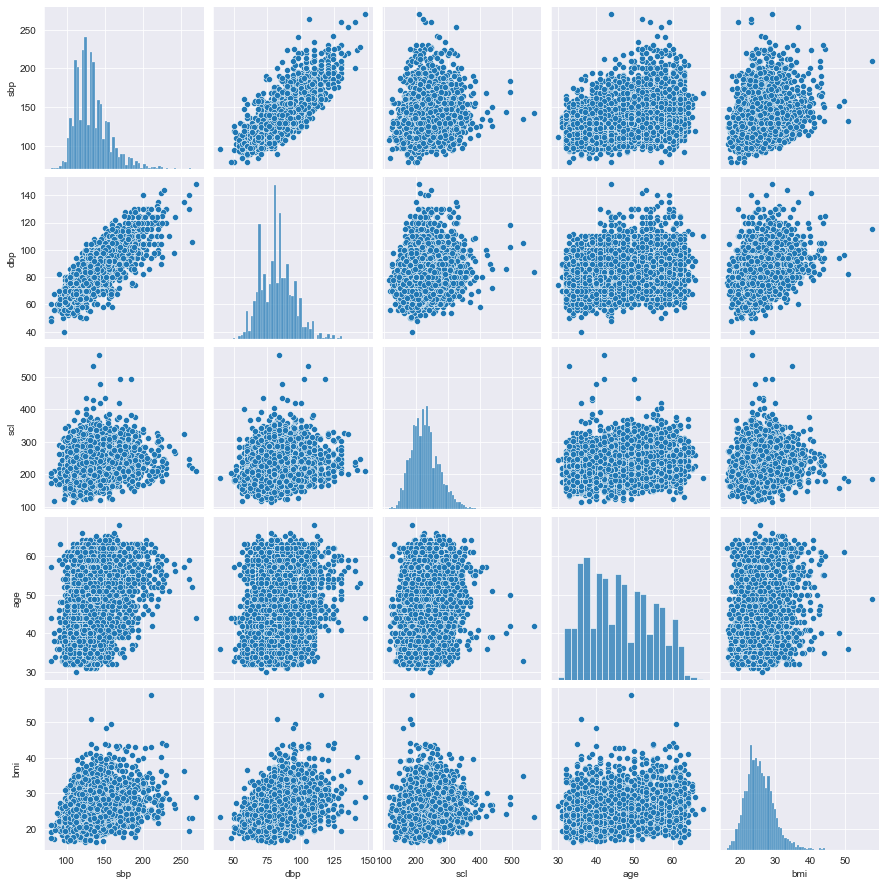

In [5]:
'''
5. Conduct model diagnostics. This reference may be helpful.
a. Look at distributions of the main predictor variables (excluding the new season 
variables). Do any require transformation?
b. Check to see if collinearity is present. Explain what you find.
c. Check linearity for each of the continuous covariates. Do those covariates each have a 
linear relationship with the outcome?
d. Are there outliers?
e. Are there at least 5 outcomes per category of sex?
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting continuous predictor variables 
continuous_predictors = ['sbp', 'dbp', 'scl', 'age', 'bmi']

sns.pairplot(df[continuous_predictors])
plt.show()

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your design matrix with all predictor variables
X_vif = df[['sex', 'sbp', 'dbp', 'scl', 'age', 'bmi', 'season_Spring', 'season_Summer', 'season_Winter']]

# Add a constant for VIF calculation
X_with_const = sm.add_constant(X_vif)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIFs
print(vif_data)


        Variable        VIF
0          const  96.931428
1            sex   1.024007
2            sbp   2.971112
3            dbp   2.781936
4            scl   1.110597
5            age   1.267254
6            bmi   1.178242
7  season_Spring   1.398541
8  season_Summer   1.296884
9  season_Winter   1.420487


In [7]:
# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)
for var in continuous_predictors:
    df[f'{var}:Log_{var}'] = df[var].apply(lambda x: x * np.log(x))

# Keep columns related to continuous variables
cols_to_keep = continuous_predictors + df.columns.tolist()[-len(continuous_predictors):]

# Redefining variables to include interaction terms
X_lt = df[cols_to_keep]

# Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Building model and fit the data (using statsmodel's Logit)
logit_results = sm.GLM(y, X_lt_constant, family=sm.families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                            GLM   Df Residuals:                     4684
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.3
Date:                Tue, 14 Nov 2023   Deviance:                       5512.7
Time:                        21:41:12   Pearson chi2:                 4.66e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06695
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sbp             0.0540      0.084      0.644      

In [8]:
from scipy import stats

# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]


extreme.sort_values("cooks_d", ascending=False)

C:\Users\93505\AppData\Local\Temp\ipykernel_47628\1496964094.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
C:\Users\93505\AppData\Local\Temp\ipykernel_47628\1496964094.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


,cooks_d,std_resid
3126,0.001735,3.108185
1258,0.001732,3.047561
809,0.001667,3.405925
1041,0.001640,3.153868
1525,0.001078,3.039020


In [9]:
outcome_counts = df.groupby('sex')['chdfate'].value_counts()
print(outcome_counts)

sex  chdfate
1    0          1226
     1           822
2    0          1998
     1           649
Name: chdfate, dtype: int64


In [10]:
'''6. Fix any issues you find and refit the model
'''
df1=df.copy()
#drop outliers
df1.drop([3126, 1258, 809, 1041,1525],inplace=True)

y= df1[['chdfate']]
X = df1[['sex', 'sbp', 'dbp', 'scl', 'bmi', 'age', 'season_Spring', 'season_Summer', 'season_Winter']]


# Standardize continuous variables
scaler = StandardScaler()
X[['sbp', 'dbp', 'scl', 'age', 'bmi']] = scaler.fit_transform(X[['sbp', 'dbp', 'scl', 'age', 'bmi']])


# Fit logistic regression model using statsmodels
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.572434
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4690
Model:                          Logit   Df Residuals:                     4681
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.07843
Time:                        21:41:51   Log-Likelihood:                -2684.7
converged:                       True   LL-Null:                       -2913.2
Covariance Type:            nonrobust   LLR p-value:                 1.200e-93
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
sex              -0.6421      0.036    -17.909      0.000      -0.712      -0.572
sbp               0.

C:\Users\93505\AppData\Local\Temp\ipykernel_47628\455100662.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['sbp', 'dbp', 'scl', 'age', 'bmi']] = scaler.fit_transform(X[['sbp', 'dbp', 'scl', 'age', 'bmi']])


In [11]:
''' Compute the ORs and their confidence intervals. Interpret the ORs
'''
odds_ratios = pd.DataFrame({'Odds Ratio': np.exp(result.params), 'CI Lower': np.exp(result.conf_int()[0]), 'CI Upper': np.exp(result.conf_int()[1])})
print(odds_ratios)

               Odds Ratio  CI Lower  CI Upper
sex              0.526203  0.490497  0.564507
sbp              1.172074  1.053099  1.304491
dbp              1.104813  0.994692  1.227125
scl              1.350655  1.262229  1.445276
bmi              1.222607  1.141366  1.309632
age              1.171295  1.090210  1.258410
season_Spring    1.232956  1.045911  1.453450
season_Summer    1.090349  0.895202  1.328037
season_Winter    1.135007  0.970156  1.327870


Section 2

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('county_level_election.csv')
df

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
0,Colorado,8117,Summit County,27239,15.173,4.918,45.996,2.5,68352,5.4,48.1,8.1,13.1,46.0,46.2,-27.632,31.530,59.162
1,Colorado,8037,Eagle County,53653,30.040,5.169,47.231,3.1,76661,10.1,47.3,9.4,11.8,31.0,47.1,-19.897,36.058,55.955
2,Idaho,16067,Minidoka County,19226,34.070,5.611,49.318,3.7,46332,24.1,11.8,18.3,34.2,80.0,61.8,54.148,71.135,16.987
3,Colorado,8113,San Miguel County,7558,10.154,4.747,46.808,3.7,59603,4.7,54.4,12.4,16.7,5.7,62.6,-44.769,23.892,68.662
4,Utah,49051,Wasatch County,21600,13.244,4.125,48.812,3.4,65207,9.5,34.4,13.9,23.0,257.8,68.3,25.357,50.471,25.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,Virginia,51103,Lancaster County,11230,1.824,30.059,53.142,6.7,45827,12.0,28.7,25.0,29.8,85.5,425.4,9.971,53.341,43.370
3062,Florida,12125,Union County,14584,5.711,25.791,34.882,4.8,40207,25.2,8.6,31.1,37.1,63.8,427.8,62.410,80.221,17.811
3063,North Dakota,38041,Hettinger County,2343,2.737,6.065,51.775,2.4,50038,12.6,16.0,26.9,29.1,3.4,433.9,68.517,81.840,13.323
3064,Nevada,32011,Eureka County,1707,14.038,8.631,46.875,6.0,70535,11.3,22.9,21.2,27.2,0.2,445.4,75.995,84.660,8.665


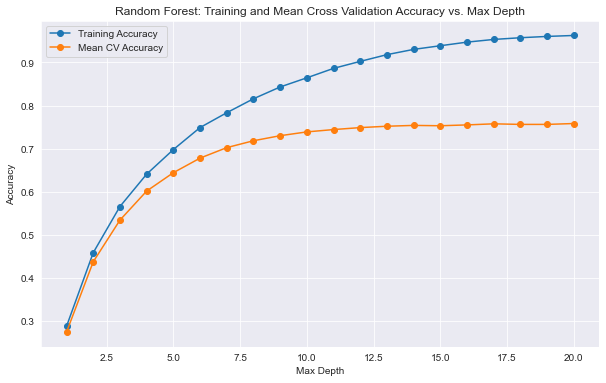

In [13]:
'''
1. Set the number of estimators to be 100, the features to be the square root of available features, 
and iterate through depths (1-20). Use only 5 folds for cross validation to save some compute 
resources. Plot the max depth on the x axis and the accuracy on the y axis for training and for 
the mean cross validation
'''
X = df.drop(['state', 'county', 'fipscode', 'votergap', 'trump', 'clinton'], axis=1)
y = df['votergap']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
n_estimators = 100
max_features = int(np.sqrt(X.shape[1]))  # Square root of features
max_depths = range(1, 21)
cv_folds = 5

# Lists to store results
train_scores = []
cv_scores_mean = []

# Iterate through max depths
for depth in max_depths:
    # Create Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=depth, random_state=42)

    # Train and evaluate on training set
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)

    # Cross-validation on training set
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=cv_folds))
    cv_scores_mean.append(cv_score)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, cv_scores_mean, label='Mean CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Training and Mean Cross Validation Accuracy vs. Max Depth')
plt.legend()
plt.show()



In [15]:
'''2. Based on the plot, how many nodes would you recommend as the max depth?'''
print(cv_scores_mean)
print()
for i in range(1,len(cv_scores_mean)):
    gap=cv_scores_mean[i]-cv_scores_mean[i-1]
    print(i+1,gap)

[0.2750430379958261, 0.43792600925393116, 0.5344844115341104, 0.6017747319108365, 0.6443837691406731, 0.6781768044084961, 0.702496785133205, 0.7184551102360235, 0.7301651753783925, 0.7389581116499595, 0.7443725438498825, 0.748922538728927, 0.7520834947758485, 0.7540298626144688, 0.7532149978018396, 0.7551803898345648, 0.7576862927071387, 0.7563347272632385, 0.7563407222193109, 0.7583779727062886]

2 0.16288297125810508
3 0.09655840228017926
4 0.06729032037672611
5 0.042609037229836555
6 0.03379303526782307
7 0.024319980724708867
8 0.01595832510281847
9 0.011710065142369053
10 0.008792936271566965
11 0.005414432199922992
12 0.0045499948790445055
13 0.0031609560469214593
14 0.0019463678386203442
15 -0.0008148648126291569
16 0.001965392032725166
17 0.0025059028725739063
18 -0.001351565443900249
19 5.994956072452595e-06
20 0.002037250486977671


In [16]:
'''3. What is the accuracy (mean cv) at your chosen depth?'''
cv_scores_mean[8]

# It's 0.7301651753783925

0.7301651753783925

Section 3

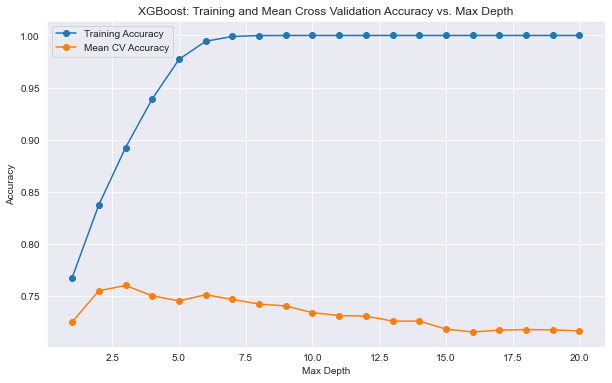

In [17]:
'''5. Use the defaults for most parameters. Iterate through depths (1-20). Use only 5 folds for cross 
validation to save some compute resources. Plot the max depth on the x axis and the accuracy 
on the y axis for training and for the mean cross validation'''
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
X = df.drop(['state', 'county', 'fipscode', 'votergap', 'trump', 'clinton'], axis=1)
y = df['votergap']


# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
max_depths = range(1, 21)
cv_folds = 5

# Lists to store results
train_scores = []
cv_scores_mean = []

# Iterate through max depths
for depth in max_depths:
    # Create XGBoost model
    model = xgb.XGBRegressor(max_depth=depth, random_state=42)

    # Train and evaluate on training set
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)

    # Cross-validation on training set
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=cv_folds))
    cv_scores_mean.append(cv_score)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, cv_scores_mean, label='Mean CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('XGBoost: Training and Mean Cross Validation Accuracy vs. Max Depth')
plt.legend()
plt.show()



In [18]:
'''6. Based on the plot, how many nodes would you recommend as the max depth?'''
# Identify the depth with the highest mean CV accuracy
best_depth = max_depths[np.argmax(cv_scores_mean)]
print(f"Best Max Depth: {best_depth}")


Best Max Depth: 3


In [19]:
'''7. What is the accuracy (mean cv) at your chosen depth?'''
print(f"Accuracy : {cv_scores_mean[2]}")

Accuracy : 0.759882085325831
